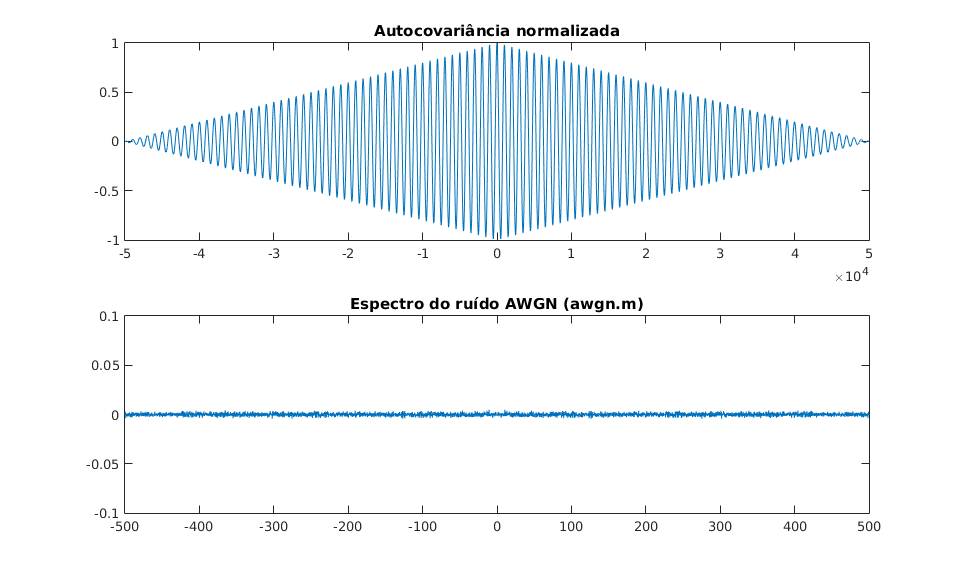

In [107]:
%% AWGN real
clc;clear all;close all;
% Parâmetros
SNR_dB = 10;                              % Determina o valor da SNR em dB
t = 0:0.0001:5;                           % Eixo do tempo
A = 2;                                    % Amplitude do sinal de entrada x(t)
x = A*cos(2*pi*10*t);                     % Sinal qualquer x(t)
T = 0.0001;                               % 

% Gerar ruído com a função awgn.m
y =  awgn(x,SNR_dB,'measured');

% Estimação da SNR pelas amostras do sinal geradas pela função awgn.m
N = length(x);  
n = y-x;
potN = sum(abs(n.^2))/N;                % Potência estimada do ruído
pTx = sum(abs(x.^2))/N;                 % Potência do sinal x(t)
SNR = pTx/potN;                         % Estimação da SNR linear
SNR = 10*log10(SNR);                    % SNR em dB

[auto_cov,lags] = xcov(x);

maximo = max(auto_cov);

% Mostrar informações
%disp('Estimação de SNR: ')
%disp(['   SNR de entrada: ' num2str(n) ' dB']);
%disp(['   SNR de entrada: ' num2str(SNR) ' dB']);

%% Espectro do sinal de entrada
lfft  = length(x);                                       % Comprimento da fft
x_fft = fftshift(fft(n,lfft)/lfft);                      % Sinal x na frequência 
Fs    = 1/T;
freq  = -Fs/2:Fs/lfft:Fs/2-Fs/lfft;

% Gráficos
fig=figure;
% Autocovariância normalizada
subplot(2,1,1);
%plot(t,n);
plot(lags,auto_cov/maximo)
title('Autocovariância normalizada');
%axis([0 1 -2 2]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 6];

%Espectro
subplot(2,1,2);
plot(freq,(x_fft));   
title('Espectro do ruído AWGN (awgn.m)');
axis([-500 500 -0.1 0.1]);
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 10 6];


%sound(abs(n),Fs);
%axis([-800 800 0 0.5]);

   SNR do sinal real: 15.0435 dB
   SNR dso sinal complexo: 10.0384 dB


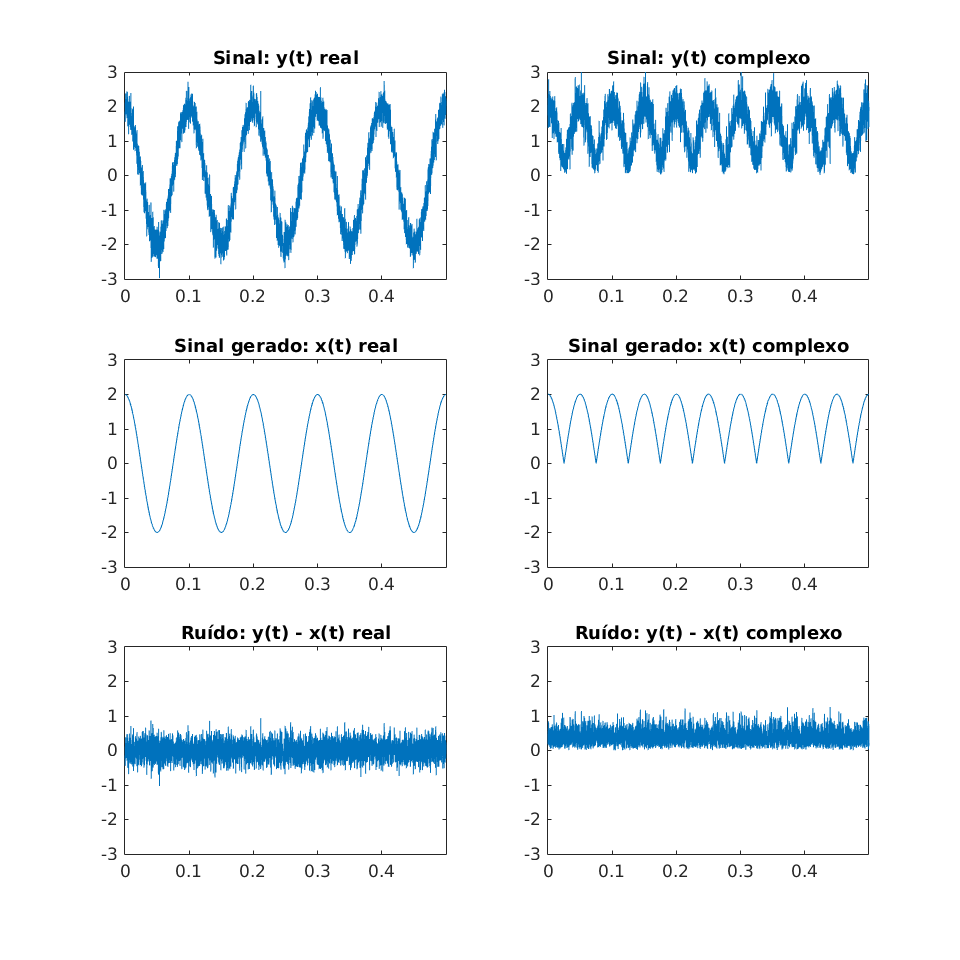

In [113]:
%% AWGN real
clc; clear all; close all;
SinalReal = load('Pratica_08_sinal_real.mat');
SinalComplexo = load('Pratica_08_sinal_complexo.mat');

fs = SinalReal.fs;
fm = SinalReal.fm;
Am = SinalReal.Am;
y_real  = SinalReal.y;

Ar = SinalComplexo.Ar;
Ai = SinalComplexo.Ai;
y_complexo  = SinalComplexo.y;

t = 0:1/fs:0.5;
x_real = Am*cos(2*pi*fm*t);
x_complexo = Ar*cos(2*pi*fm*t) + i*Ai*cos(2*pi*fm*t);

n_real = y_real - x_real;
n_complexo = y_complexo - x_complexo;

% Estimação da SNR - Sinal Real
N = length(x_real); 

potN1 = sum(abs(n_real.^2))/N;           % Potência estimada do ruído
pTx1 = sum(abs(x_real.^2))/N;            % Potência do sinal x(t)
SNR1 = pTx1/potN1;                       % Estimação da SNR linear
SNR1 = 10*log10(SNR1);                   % SNR em dB

% Estimação da SNR - Sinal Complexo
N = length(x_complexo); 

potN2 = sum(abs(n_complexo.^2))/N;       % Potência estimada do ruído
pTx2 = sum(abs(x_complexo.^2))/N;        % Potência do sinal x(t)
SNR2 = pTx2/potN2;                       % Estimação da SNR linear
SNR2 = 10*log10(SNR2);                   % SNR em dB

disp(['   SNR do sinal real: ' num2str(SNR1) ' dB']);
disp(['   SNR dso sinal complexo: ' num2str(SNR2) ' dB']);

% Gráficos
fig=figure;

subplot(3,2,1);
plot(t, y_real)
title('Sinal: y(t) real');
axis([0 0.5 -3 3]);

subplot(3,2,2);
plot(t, abs(y_complexo));
title('Sinal: y(t) complexo');
axis([0 0.5 -3 3]);


%Espectro
subplot(3,2,3);
plot(t, x_real);   
title('Sinal gerado: x(t) real');
axis([0 0.5 -3 3]);

%Espectro
subplot(3,2,4);
plot(t, abs(x_complexo));   
title('Sinal gerado: x(t) complexo');
axis([0 0.5 -3 3]);


%Espectro
subplot(3,2,5);
plot(t, n_real);   
title('Ruído: y(t) - x(t) real');
axis([0 0.5 -3 3]);

%Espectro
subplot(3,2,6);
plot(t, abs(n_complexo));   
title('Ruído: y(t) - x(t) complexo');
axis([0 0.5 -3 3]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 10 10];

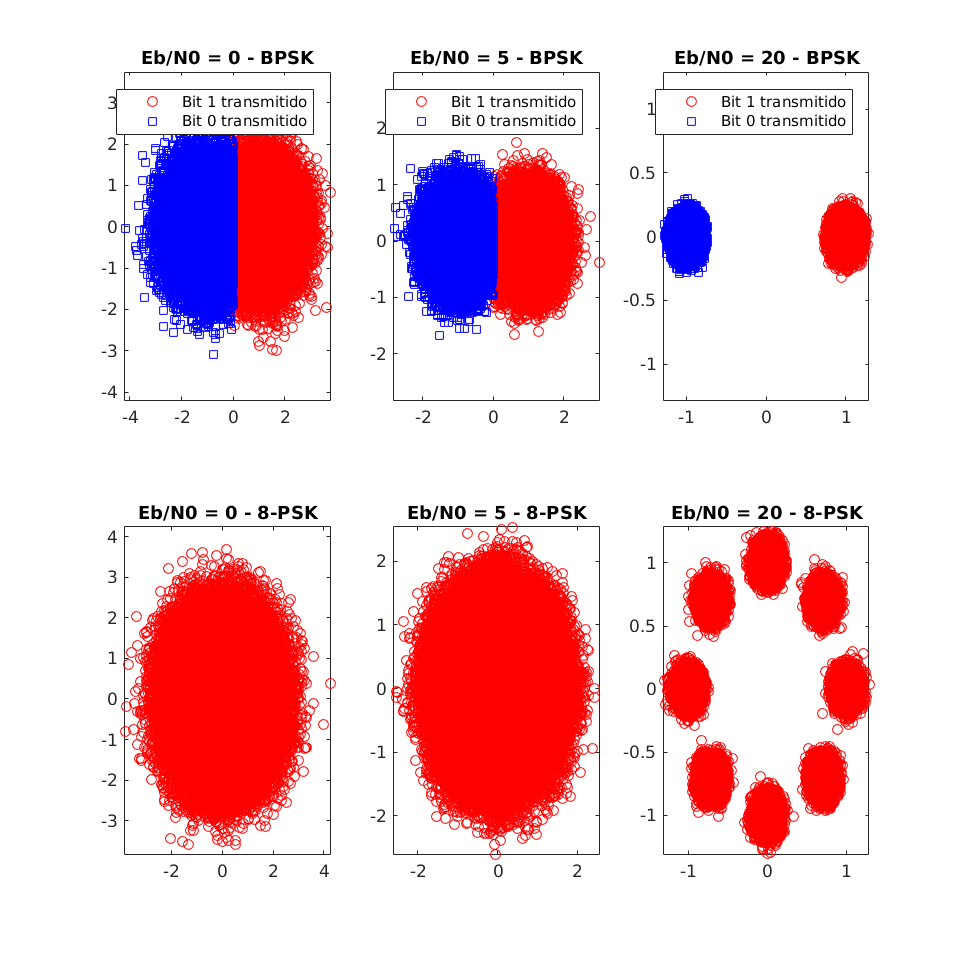

In [136]:
% Parâmetros
EbN0_dB = [0, 5, 20];                                       % Eb/N0 de entrada

Ns = 10^5;                                                  % Número de símbolos simulados

M = [2 8];                                                 % Número de símbolo da modulação

% Sinal BPSK gerado pela função pskmod
bits2 = randi([0 M(1)-1],Ns,1);
txSig = pskmod(bits2,M(1));

rxSig1 = awgn(txSig,EbN0_dB(1));
rxSig2 = awgn(txSig,EbN0_dB(2));
rxSig3 = awgn(txSig,EbN0_dB(3));

% Sinal BPSK gerado pela função pskmod
bits8 = randi([0 M(2)-1],Ns,1);
txSig = pskmod(bits8,M(2));

rxSig4 = awgn(txSig,EbN0_dB(1));
rxSig5 = awgn(txSig,EbN0_dB(2));
rxSig6 = awgn(txSig,EbN0_dB(3));

% Gráficos
% BPSK
fig=figure;
subplot(2,3,1);
plot(rxSig1(find(real(rxSig1)>0)),'ro');
hold on;
plot(rxSig1(find(real(rxSig1)<=0)),'bs')
title('Eb/N0 = 0 - BPSK');
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig1)' imag(rxSig1)']);
maxAx = max([real(rxSig1)' imag(rxSig1)']);
axis([minAx maxAx minAx maxAx]);

subplot(2,3,2);
plot(rxSig2(find(real(rxSig2)>0)),'ro');
hold on;
plot(rxSig2(find(real(rxSig2)<=0)),'bs')
title('Eb/N0 = 5 - BPSK');
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig2)' imag(rxSig2)']);
maxAx = max([real(rxSig2)' imag(rxSig2)']);
axis([minAx maxAx minAx maxAx]);

subplot(2,3,3);
plot(rxSig3(find(real(rxSig3)>0)),'ro');
hold on;
plot(rxSig3(find(real(rxSig3)<=0)),'bs')
title('Eb/N0 = 20 - BPSK');
legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig3)' imag(rxSig3)']);
maxAx = max([real(rxSig3)' imag(rxSig3)']);
axis([minAx maxAx minAx maxAx]);


%8-PSK
subplot(2,3,4);
plot(rxSig4,'ro');
title('Eb/N0 = 0 - 8-PSK');
%legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig4)' imag(rxSig4)']);
maxAx = max([real(rxSig4)' imag(rxSig4)']);
axis([minAx maxAx minAx maxAx]);

subplot(2,3,5);
plot(rxSig5,'ro');
title('Eb/N0 = 5 - 8-PSK');
%legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig5)' imag(rxSig5)']);
maxAx = max([real(rxSig5)' imag(rxSig5)']);
axis([minAx maxAx minAx maxAx]);

subplot(2,3,6);
plot(rxSig6,'ro');
title('Eb/N0 = 20 - 8-PSK');
%legend('Bit 1 transmitido','Bit 0 transmitido');
minAx = min([real(rxSig6)' imag(rxSig6)']);
maxAx = max([real(rxSig6)' imag(rxSig6)']);
axis([minAx maxAx minAx maxAx]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 10 10];